In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
sample_submission = pd.read_csv('../data/house-prices-advanced-regression-techniques/sample_submission.csv')

In [3]:
sample_submission.head()

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977


In [4]:
sample_submission.describe()

,Id,SalePrice
count,1459.000000,1459.000000
mean,2190.000000,179183.918243
std,421.321334,16518.303051
min,1461.000000,135751.318893
25%,1825.500000,168703.011202
50%,2190.000000,179208.665698
75%,2554.500000,186789.409363
max,2919.000000,281643.976117


In [5]:
len(sample_submission)

1459

In [6]:
train_data = pd.read_csv('../data/house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('../data/house-prices-advanced-regression-techniques/test.csv')

In [7]:
train = train_data.copy()
test = test_data.copy()

In [8]:
gt_train = train.SalePrice
train = train.drop(['Id', 'SalePrice'], axis=1)

In [9]:
test_id = test.Id
test = test.drop('Id', axis=1)

In [10]:
train.shape

(1460, 79)

In [11]:
test.shape

(1459, 79)

In [12]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [13]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Data Description

MSSubClass
- どのようなスタイルの家なのかを識別するクラス
- multi class

MSZoning
- 家がある地区の特徴のクラス
- multi class

LotFrontage
- 家から大きな通りまでの線形の徒歩距離的な？
- distance

LotArea
- 平方フィート（つまり，敷地面積の広さ）
- area

Street
- 家が接続されている道路の状況（砂利か舗装道路か）
- binary class

Alley
- 家の横とかの路地の道路状況（砂利か舗装かなしか）
- multi class

LotShape
- 土地（財産）の形
- multi class

LandContour
- 地形（フラットかどうか）
- multi class

Utilities
- 利用可能なエネルギー（ガスとか電気とか）
- multi class

LotConfig
- 家のポジション？角か，行き止まりのところにあるかとか
- multi class

LandSlope
- 土地の傾き？
- multi class

Neighborhood
- Ames市の中の物理的な場所・地区
- multi class

Condition1
- 便利な場所への近さ, 鉄道や幹線道路など
- multi class

Condition2
- 1と同じ．（もしある場合は記入される）
- multi class

BldgType
- 何世帯が住む想定の家か，どのような作りになっているか
- multi class

HouseStyle
- 住居のスタイル
- multi class

OverallQual
- 家の材料と仕上げに対する評価（重要そう）
- multi class

OverallCond
- 家の条件に関する評価（重要そう）
- multi class

YearBuilt
- 作られた日
- date

YearRemoAdd
- リフォームされた日（リフォームされていない場合は，作られた日と同日）

RoofStyle
- 屋根のスタイル
- multi class

Roof Matl
- 屋根の素材
- multi class

Exterior1st
- 外観の作り
- multi class

Exterior2nd
- 外観の作り（もう一つあれば記入される）
- multi class

MasVnrType
- 石積みのベニヤのタイプ？
- multi class

MasVnrArea
- 石積みのベニアのエリア
- square feet

ExterQual
- 外観の素材の質に関する評価
- multi class

ExterCond
- 外観の素材の現状に関する評価
- multi class

Foundation
- 土台のタイプ
- multi class

BsmtQual
- ベースの高さに関する評価
- multi class

BsmtCond
- ベースの一般的なコンディションに関する評価
- multi class

長いので諦める．．．
必要になったらその都度調べることにする

## Fill in the missing data

In [14]:
train.isnull().sum()[train.isnull().sum() != 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

### LotFrontage

In [15]:
train.LotFrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

lotfrontageのNULLはないのか，測定漏れなのかわからない．

おそらく欠損値である可能性が高いので，平均分散からサンプリングするか，平均で埋めるかどっちかにした方が良さげ．

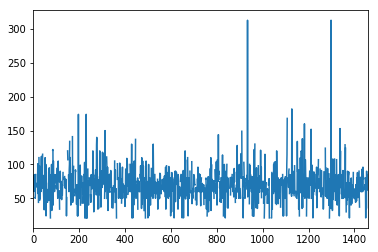

In [16]:
train.LotFrontage.plot()

In [17]:
np.unique(train.Condition1[train.LotFrontage.isnull()])

array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
       'RRNn'], dtype=object)

Norm      223
Feedr      14
PosN       10
PosA        4
Artery      2
RRAe        2
RRAn        2
RRNn        1
RRNe        1
Name: Condition1, dtype: int64

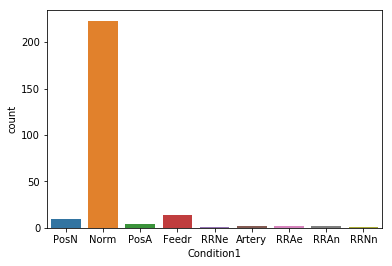

In [18]:
g = sns.countplot(train.Condition1[train.LotFrontage.isnull()])
train.Condition1[train.LotFrontage.isnull()].value_counts()

Norm    257
RRAn      1
RRAe      1
Name: Condition2, dtype: int64

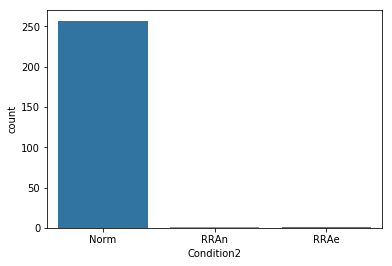

In [19]:
g = sns.countplot(train.Condition2[train.LotFrontage.isnull()])
train.Condition2[train.LotFrontage.isnull()].value_counts()

In [20]:
train.LotFrontage = train.LotFrontage.fillna(train.LotFrontage.mean())

In [21]:
train.isnull().sum()[train.isnull().sum() != 0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [22]:
# train.MSSubClass = train.MSSubClass.astype('category')

In [23]:
train.dtypes.values=='O'

array([False,  True, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True, False,  True, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False, False,  True,
        True,  True, False, False, False, False, False, False,  True,
        True,  True, False, False, False,  True,  True])

In [24]:
Alley = train.Alley.copy()
Alley = Alley.fillna('None')

In [25]:
MasVnrType = train.MasVnrType.copy()
MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [26]:
MasVnrType.isnull().sum()

8

In [27]:
MasVnrType = MasVnrType.fillna('None')
# MasVnrType = MasVnrType.astype('category')

In [28]:
MasVnrArea = train.MasVnrArea.copy()
train[MasVnrArea.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
234,60,RL,70.049958,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
529,20,RL,70.049958,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,...,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca
650,60,FV,65.000000,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal
936,20,RL,67.000000,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal
973,20,FV,95.000000,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,12,2008,New,Partial
977,120,FV,35.000000,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,11,2007,New,Partial
1243,20,RL,107.000000,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,New,Partial
1278,60,RL,75.000000,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal


In [29]:
MasVnrArea = MasVnrArea.fillna('None')
# MasVnrArea = MasVnrArea.astype('category')

In [30]:
train[train.BsmtQual.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
17,90,RL,72.000000,10791,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,Shed,500,10,2006,WD,Normal
39,90,RL,65.000000,6040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2008,WD,AdjLand
90,20,RL,60.000000,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal
102,90,RL,64.000000,7018,Pave,NaN,Reg,Bnk,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2009,WD,Alloca
156,20,RL,60.000000,7200,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
182,20,RL,60.000000,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,6,2007,WD,Normal
259,20,RM,70.000000,12702,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
342,90,RL,70.049958,8544,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal
362,85,RL,64.000000,7301,Pave,NaN,Reg,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,7,2009,ConLD,Normal
371,50,RL,80.000000,17120,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal


In [31]:
BsmtQual = train.BsmtQual.copy()
BsmtCond = train.BsmtCond.copy()
BsmtExposure = train.BsmtExposure.copy()
BsmtFinType1 = train.BsmtFinType1.copy()
BsmtFinSF1 = train.BsmtFinSF1.copy()
BsmtFinType2 = train.BsmtFinSF2.copy()
BsmtUnfSF = train.BsmtUnfSF.copy()

In [32]:
BsmtQual.value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [33]:
BsmtExposure.value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [34]:
BsmtQual = BsmtQual.fillna('None')
BsmtCond = BsmtCond.fillna('None')
BsmtExposure = BsmtExposure.fillna('None')
BsmtFinType1 = BsmtFinType1.fillna('None')
BsmtFinType2 = BsmtFinType2.fillna('None')

In [35]:
train.isnull().sum()[train.isnull().sum() != 0]

Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [36]:
train[train.Electrical.isnull()]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1379,80,RL,73.0,9735,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal


In [37]:
train.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [38]:
Electrical = train.Electrical.copy()
Electrical = Electrical.fillna('SBrkr')

In [39]:
FireplaceQu = train.FireplaceQu.copy()
FireplaceQu.value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [40]:
FireplaceQu = FireplaceQu.fillna('None')

In [41]:
train.GarageType.value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [42]:
GarageType = train.GarageType.copy()
GarageYrBlt = train.GarageYrBlt.copy()
GarageFinish = train.GarageFinish.copy()
GarageQual = train.GarageQual.copy()
GarageCond = train.GarageCond.copy()

GarageType = GarageType.fillna('None')
GarageYrBlt = GarageYrBlt.fillna('None')
GarageFinish = GarageFinish.fillna('None')
GarageQual = GarageQual.fillna('None')
GarageCond = GarageCond.fillna('None')

In [43]:
train.PoolArea.value_counts()

0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

In [44]:
train.PoolQC.value_counts()

Gd    3
Fa    2
Ex    2
Name: PoolQC, dtype: int64

In [45]:
PoolQC = train.PoolQC.copy()
PoolQC = PoolQC.fillna('None')

In [46]:
train.Fence.value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [47]:
Fence = train.Fence.copy()
Fence = Fence.fillna('None')

In [48]:
MiscFeature = train.MiscFeature.copy()
MiscFeature.value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [49]:
MiscFeature = MiscFeature.fillna('None')

In [50]:
train.Alley = Alley
train.MasVnrType = MasVnrType
train.MasVnrArea = MasVnrArea
train.BsmtQual = BsmtQual
train.BsmtCond = BsmtCond
train.BsmtExposure = BsmtExposure
train.BsmtFinType1 = BsmtFinType1
train.BsmtFinType2 = BsmtFinType2
train.Electrical = Electrical
train.FireplaceQu = FireplaceQu
train.GarageType = GarageType
train.GarageYrBlt = GarageYrBlt
train.GarageFinish = GarageFinish
train.GarageQual = GarageQual
train.GarageCond = GarageCond
train.PoolQC = PoolQC
train.Fence = Fence
train.MiscFeature = MiscFeature

In [51]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal


In [55]:
train.isnull().sum()[train.isnull().sum() != 0]

Series([], dtype: int64)

In [60]:
cols = list(train.columns)

In [69]:
obj_columns = train.select_dtypes(['object']).columns

In [70]:
obj_columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [71]:
train[obj_columns] = train[obj_columns].apply(lambda x: x.astype('category').cat.codes)

In [77]:
train.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
MSSubClass,1.000000,0.035900,-3.570559e-01,-0.139781,-0.024969,0.099430,0.119289,-0.002940,-2.284384e-02,0.075910,...,-0.026030,0.008283,-0.005221,0.086360,-0.046881,-0.007683,-0.013585,-0.021407,0.012464,-0.024940
MSZoning,0.035900,1.000000,-1.063635e-01,-0.034452,0.087654,-0.368086,0.061887,-0.017854,-1.192034e-03,-0.009895,...,0.019089,-0.003128,0.002882,-0.061289,-0.005553,0.009293,-0.031496,-0.020628,0.097437,0.009494
LotFrontage,-0.357056,-0.106363,1.000000e+00,0.306795,-0.037323,-0.065017,-0.144931,-0.075647,5.171411e-18,-0.181253,...,0.037684,0.180868,-0.191630,-0.036751,0.009213,0.001168,0.010158,0.006768,-0.030846,0.058464
LotArea,-0.139781,-0.034452,3.067946e-01,1.000000,-0.197131,-0.029676,-0.165315,-0.149083,1.012318e-02,-0.121161,...,0.043160,0.077672,-0.065167,0.036031,0.106135,0.038068,0.001205,-0.014261,0.012292,0.034169
Street,-0.024969,0.087654,-3.732277e-02,-0.197131,1.000000,-0.001587,-0.010224,0.115995,1.681767e-03,0.013960,...,-0.033160,0.004413,-0.004067,-0.029386,-0.160748,-0.022733,0.003690,-0.025043,0.014339,0.006064
Alley,0.099430,-0.368086,-6.501676e-02,-0.029676,-0.001587,1.000000,-0.041920,0.023263,6.466215e-04,-0.008167,...,0.003621,0.001697,-0.001564,0.044473,-0.054428,-0.013881,-0.011274,0.015176,0.001092,-0.000162
LotShape,0.119289,0.061887,-1.449309e-01,-0.165315,-0.010224,-0.041920,1.000000,0.085434,-3.610068e-02,0.221102,...,-0.053054,-0.020051,0.018156,-0.045633,-0.008090,-0.042061,-0.033455,0.036449,-0.000911,-0.038118
LandContour,-0.002940,-0.017854,-7.564653e-02,-0.149083,0.115995,0.023263,0.085434,1.000000,8.238030e-03,-0.025527,...,0.003836,-0.013098,0.000731,-0.043773,0.011668,0.020912,-0.011599,0.020507,-0.025754,0.033809
Utilities,-0.022844,-0.001192,5.171411e-18,0.010123,0.001682,0.000647,-0.036101,0.008238,1.000000e+00,-0.032589,...,0.102365,-0.001798,0.001657,0.011976,-0.004869,-0.002296,-0.051552,0.023353,-0.126770,-0.089701
LotConfig,0.075910,-0.009895,-1.812535e-01,-0.121161,0.013960,-0.008167,0.221102,-0.025527,-3.258930e-02,1.000000,...,-0.004657,-0.046798,0.054786,0.058067,-0.015821,-0.018427,0.018902,-0.005992,0.014325,0.051579


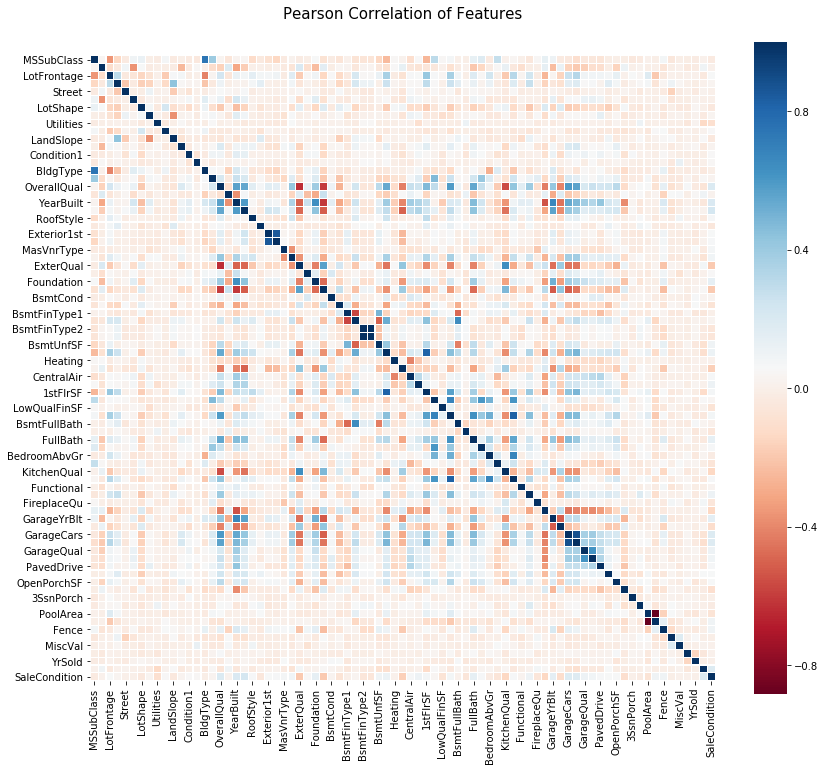

In [79]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(train.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white')

In [80]:
test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [83]:
import pickle
names = ['train', 'train_gt', 'test', 'test_id']
datas = [train, gt_train, test, test_id]
for name, data in zip(names, datas):
    with open('../ckpt/{}.pkl'.format(name), mode='wb') as f:
        pickle.dump(data, f)